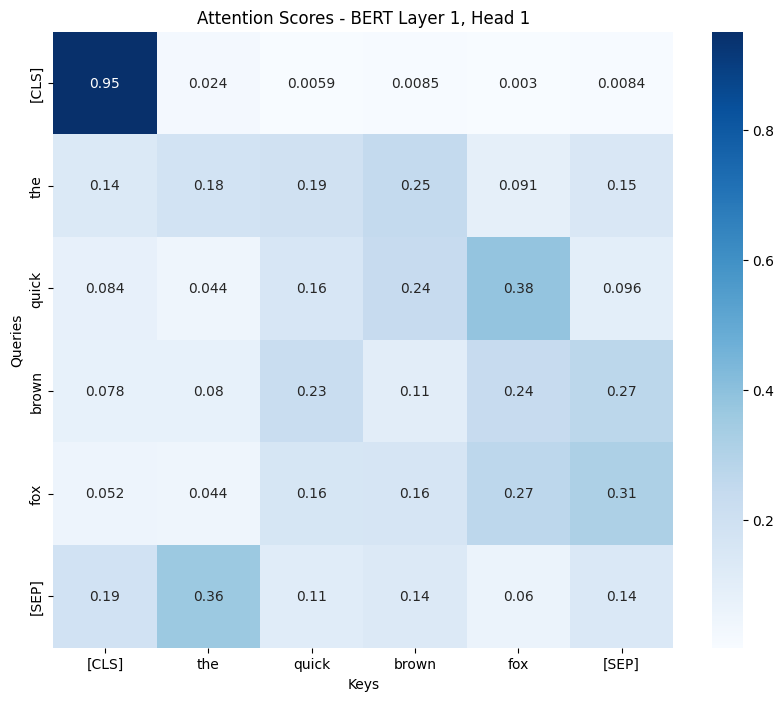

In [7]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns

# Example sentence
sentence = "The quick brown fox"

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Tokenize the input sentence and convert to tensor
inputs = tokenizer(sentence, return_tensors="pt")

# Forward pass, get hidden states and attention
with torch.no_grad():
    outputs = model(**inputs)

# Extract attention weights from the first layer
attention = outputs.attentions[0][0]  # [0] for the first layer, [0] for the first head
attention_head_1 = attention[1]

# Get the tokens for labeling the axes in the plot
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(attention_head_1, xticklabels=tokens, yticklabels=tokens, annot=True, cmap='Blues')
plt.title("Attention Scores - BERT Layer 1, Head 1")
plt.xlabel("Keys")
plt.ylabel("Queries")
plt.show()